### Exercise 1: Embedding 1

In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp("car")
# Afficher la version du modèle
# print(nlp.meta["version"])

embedding = doc.vector
print("Forme de l'embedding :", embedding.shape)

#
somme_embedding = sum(embedding[:20])  

numerateur, denominateur = somme_embedding.as_integer_ratio()
print(f"({numerateur}, {denominateur})")



Forme de l'embedding : (96,)
(99959115, 33554432)


### Exercise 2: Tokenization

In [16]:
text = "Tokenize this sentence. And this one too."
doc = nlp(text)

for token in doc:
    print(token)
   

Tokenize
this
sentence
.
And
this
one
too
.


### Exercise 3: Embeddings 2

In [3]:
#1
text= "laptop computer coffee tea water liquid dog cat kitty"
nlp = spacy.load("en_core_web_md")
doc = nlp(text)
embedding = doc.vector

for token in doc:
    print(f"Word: {token.text}, shape: {token.vector.shape} , sum first 20 values of the embedding: {token.vector[:20].sum()}")



Word: laptop, shape: (300,) , sum first 20 values of the embedding: 5.71038818359375
Word: computer, shape: (300,) , sum first 20 values of the embedding: 23.809497833251953
Word: coffee, shape: (300,) , sum first 20 values of the embedding: -4.402168273925781
Word: tea, shape: (300,) , sum first 20 values of the embedding: -1.3850314617156982
Word: water, shape: (300,) , sum first 20 values of the embedding: -3.838740348815918
Word: liquid, shape: (300,) , sum first 20 values of the embedding: -6.875599384307861
Word: dog, shape: (300,) , sum first 20 values of the embedding: -7.0038580894470215
Word: cat, shape: (300,) , sum first 20 values of the embedding: -1.6476582288742065
Word: kitty, shape: (300,) , sum first 20 values of the embedding: -9.011079788208008


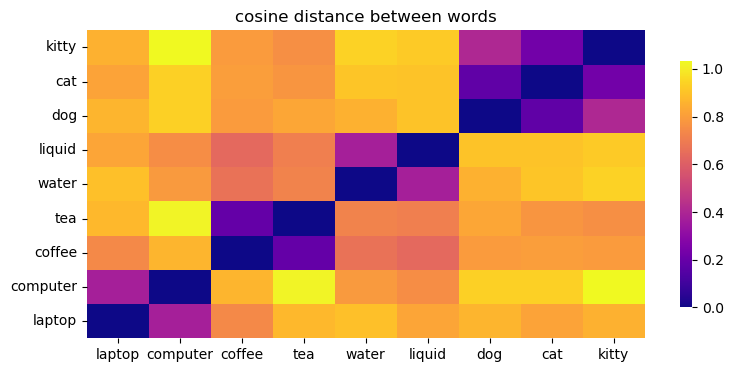

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def norm(v):
    n= np.sqrt(np.dot(v, v))
    return n

def cosine_similarity(v1, v2):
    similarity= np.dot(v1, v2)/ (norm(v1) * norm(v2))
    return similarity


tokens=[]
for token in doc:
    tokens.append(token.text)

distance_matrice=[]
for token_1 in list(doc)[::-1]:
    tmp=[]
    for token_2 in doc:
        cosine_distance=1-cosine_similarity(token_1.vector, token_2.vector)
        tmp.append(cosine_distance)
    distance_matrice.append(tmp)


df= pd.DataFrame(distance_matrice, index=tokens[::-1], columns=tokens)

plt.figure(figsize=(9, 4))
sns.heatmap(df, cmap='plasma' ,cbar_kws={"shrink": .8})
plt.title('cosine distance between words')
plt.xticks(rotation=0)
plt.show()

### Exercise 4: Sentences' similarity

In [14]:
sentence_1 = "I want to buy shoes"
sentence_2 = "I would love to purchase running shoes"
sentence_3 = "I am in my room"

nl = spacy.load("en_core_web_sm")

doc1 = nl(sentence_1)
doc2 = nl(sentence_2)
doc3 = nl(sentence_3)

#print(cosine_similarity(doc1.vector, doc2.vector))
#print(cosine_similarity(doc1.vector, doc3.vector))
#print(cosine_similarity(doc2.vector, doc3.vector))

print(doc1.similarity(doc2))
print(doc1.similarity(doc3))
print(doc2.similarity(doc3))

0.6591544223598693
0.41670519951592866
0.2896134415926442


/tmp/ipykernel_32064/1415825882.py:15: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1.similarity(doc2))
/tmp/ipykernel_32064/1415825882.py:16: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger mo

### Exercise 5: NER

In [13]:
# Charger le modèle anglais
nlp = spacy.load('en_core_web_md')

# Définir un texte d'exemple
texte = (
    "Apple Inc. is an American multinational technology company headquartered in Cupertino, California, "
    "that designs, develops, and sells consumer electronics, computer software, and online services. "
    "It is considered one of the Big Five companies in the U.S. information technology industry, "
    "along with Amazon, Google, Microsoft, and Facebook. "
    "Apple was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in April 1976 to develop and sell "
    "Wozniak's Apple I personal computer, though Wayne sold his share back within 12 days. "
    "It was incorporated as Apple Computer, Inc., in January 1977, and sales of its computers, including "
    "the Apple I and Apple II, grew quickly."
)

# Traiter le texte
doc = nlp(texte)

for ent in doc.ents:
    print(f"{ent.text}  {ent.label_}")


Apple Inc.  ORG
American  NORP
Cupertino  GPE
California  GPE
one  CARDINAL
U.S.  GPE
Amazon  ORG
Google  ORG
Microsoft  ORG
Facebook  ORG
Apple  ORG
Steve Jobs  PERSON
Steve Wozniak  PERSON
Ronald Wayne  PERSON
April 1976  DATE
Wozniak  PERSON
Apple  ORG
Wayne  PERSON
12 days  DATE
Apple Computer, Inc.  ORG
January 1977  DATE
Apple  ORG
Apple II  ORG


In [7]:
#2
sentence= " Paul eats an apple while watching a movie on his Apple device."
doc = nlp(sentence)
for ent in doc.ents:
    print(f"{ent.text} {ent.start_char} {ent.end_char} {ent.label_}")


Paul 1 5 PERSON
Apple 50 55 ORG


### Exercise 6: Part-of-speech tags

In [12]:
import io

file=io.open("./data/news_amazon.txt", 'r', encoding='utf-8')
text=file.read()
file.close()
nlp = spacy.load('en_core_web_md')
doc = nlp(text)

sentences_with_bezos = []

for sent in doc.sents:
    if any(token.text == "Bezos" and token.tag_ == "NNP" for token in sent):
        sentences_with_bezos.append(sent.text)


for sentence in sentences_with_bezos:
    print("INFO:  Bezos PROPN NNP")
    print(f'sentence : {sentence}, "\n')

INFO:  Bezos PROPN NNP
sentence : Amazon (AMZN) enters 2021 with plenty of big opportunities, but is losing its lauded Chief Executive Jeff Bezos, who announced his plan to step aside in the third quarter., "

INFO:  Bezos PROPN NNP
sentence : Bezos will hand off his role as chief executive to Andy Jassy, the CEO of its cloud computing unit., "

INFO:  Bezos PROPN NNP
sentence : He's not leaving, as Bezos will transition to the role of Executive Chairman and remain active., "

INFO:  Bezos PROPN NNP
sentence : "When you look at our financial results, what you're actually seeing are the long-run cumulative results of invention," Bezos said in written remarks with the Amazon earnings release., "

